<a href="https://colab.research.google.com/github/PerfectMach1ne/uni-ai-ml/blob/main/ProjektSSI_Eksploracja_i_przygotowanie.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Projekt - Systemy sztucznej inteligencji
## Eksploracja danych

Dataset użyty w projekcie to "[Student performance prediction](https://www.kaggle.com/datasets/rkiattisak/student-performance-in-mathematics/data)", skupiający się na postępach w nauce uczniów szkół średnich w US; wg. źródła, dane zostały pobrane z 3 szkół średnich w Stanach Zjednoczonych.

#### Przygotowanie środowiska

In [1]:
import os
from pathlib import Path
import numpy as np
import pandas as pd

current_path = Path(os.path.dirname(os.path.abspath("__file__")))

In [67]:
file_name="exams.csv"
df=pd.read_csv(os.path.join(current_path,file_name))

### Eksploracja i adiustacja danych



In [59]:
df.head(7)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group D,some college,standard,completed,59,70,78
1,male,group D,associate's degree,standard,none,96,93,87
2,female,group D,some college,free/reduced,none,57,76,77
3,male,group B,some college,free/reduced,none,70,70,63
4,female,group D,associate's degree,standard,none,83,85,86
5,male,group C,some high school,standard,none,68,57,54
6,female,group E,associate's degree,standard,none,82,83,80


In [60]:
df.count()

gender                         1000
race/ethnicity                 1000
parental level of education    1000
lunch                          1000
test preparation course        1000
math score                     1000
reading score                  1000
writing score                  1000
dtype: int64

#### Zamiana typów cech kategorialnych

In [66]:
df.dtypes

gender                         category
race/ethnicity                 category
parental level of education    category
lunch                          category
test preparation course        category
math score                        int64
reading score                     int64
writing score                     int64
dtype: object

In [68]:
categorical_cols = [(col, str(col_type))[0] for (col, col_type)
                    in zip(df.dtypes.index, df.dtypes.to_list()) # Pobranie list nazw i typów cech
                    if col_type == 'object'] # Wyszukanie cech nieilościowych
print(categorical_cols)
df[categorical_cols] = df[categorical_cols].apply(pd.Categorical) # Zamiana typów 'object' na typ 'category'

['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']


In [50]:
df.dtypes

gender                         category
race/ethnicity                 category
parental level of education    category
lunch                          category
test preparation course        category
math score                        int64
reading score                     int64
writing score                     int64
dtype: object

#### Opis danych kategorialnych/jakościowych

In [51]:
df.describe(include="category")

,gender,race/ethnicity,parental level of education,lunch,test preparation course
count,1000,1000,1000,1000,1000
unique,2,5,6,2,2
top,male,group C,some college,standard,none
freq,508,323,224,660,656


In [57]:
print("======= Wartości unikatowe i ich liczebność dla cechy kategorialnych")
for cat_col_name in categorical_cols:
  print(f"======= Cecha '{cat_col_name}'")
  print(df[cat_col_name].unique())
  print(df[cat_col_name].value_counts())

======= Wartości unikatowe i ich liczebność dla cechy kategorialnych
======= Cecha 'gender'
['female', 'male']
Categories (2, object): ['female', 'male']
male      508
female    492
Name: gender, dtype: int64
======= Cecha 'race/ethnicity'
['group D', 'group B', 'group C', 'group E', 'group A']
Categories (5, object): ['group A', 'group B', 'group C', 'group D', 'group E']
group C    323
group D    257
group B    198
group E    143
group A     79
Name: race/ethnicity, dtype: int64
======= Cecha 'parental level of education'
['some college', 'associate's degree', 'some high school', 'bachelor's degree', 'master's degree', 'high school']
Categories (6, object): ['associate's degree', 'bachelor's degree', 'high school', 'master's degree',
                         'some college', 'some high school']
some college          224
high school           215
associate's degree    204
some high school      177
bachelor's degree     105
master's degree        75
Name: parental level of education, dt

#### Opis danych ilościowych

In [4]:
df.describe()

,math score,reading score,writing score
count,1000.000000,1000.000000,1000.000000
mean,67.810000,70.382000,69.140000
std,15.250196,14.107413,15.025917
min,15.000000,25.000000,15.000000
25%,58.000000,61.000000,59.000000
50%,68.000000,70.500000,70.000000
75%,79.250000,80.000000,80.000000
max,100.000000,100.000000,100.000000


#### Wyszukanie potencjalnych braków w danych

In [71]:
for col in df.columns.to_list():
  print(f"Braki w kolumnie {col}: {sum(df[col].isna())}")

Braki w kolumnie gender: 0
Braki w kolumnie race/ethnicity: 0
Braki w kolumnie parental level of education: 0
Braki w kolumnie lunch: 0
Braki w kolumnie test preparation course: 0
Braki w kolumnie math score: 0
Braki w kolumnie reading score: 0
Braki w kolumnie writing score: 0


#### Rozkład wartości cech ilościowych

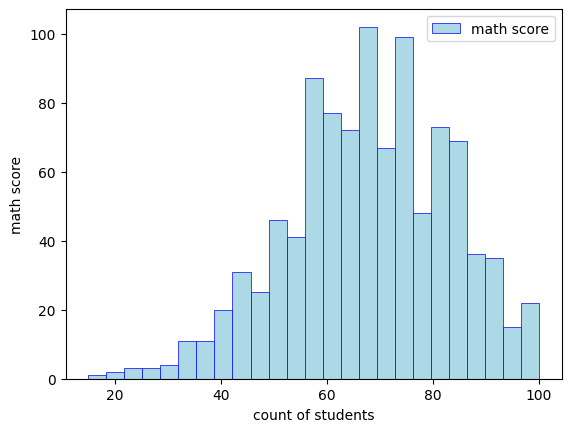

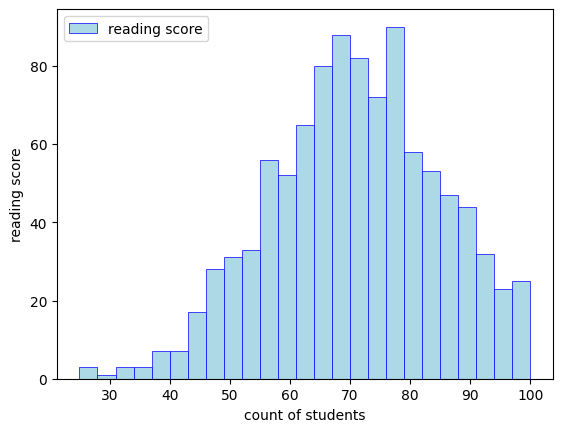

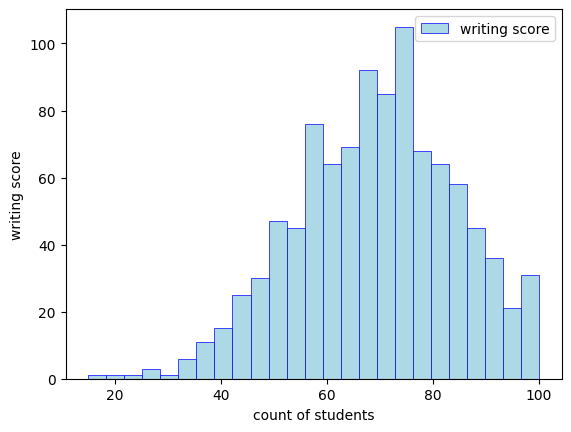

In [93]:
import matplotlib.pyplot as plt
numerical_cols = [col for col in df.columns.to_list() if col not in categorical_cols] # Wybranie kolumn numerycznych

for num_col in numerical_cols:
  hist = plt.hist(df[num_col], bins=25, color="lightblue", ec="blue", lw=0.5, label=num_col)
  plt.ylabel(num_col)
  plt.xlabel("count of students")
  plt.legend()
  plt.show()
  hist

#### Sprawdzenie obecności outlierów

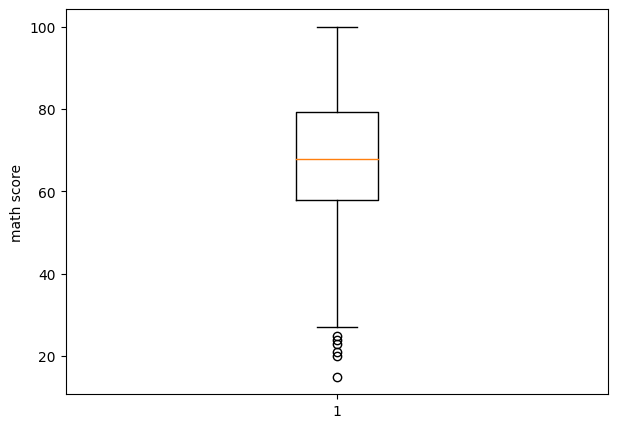

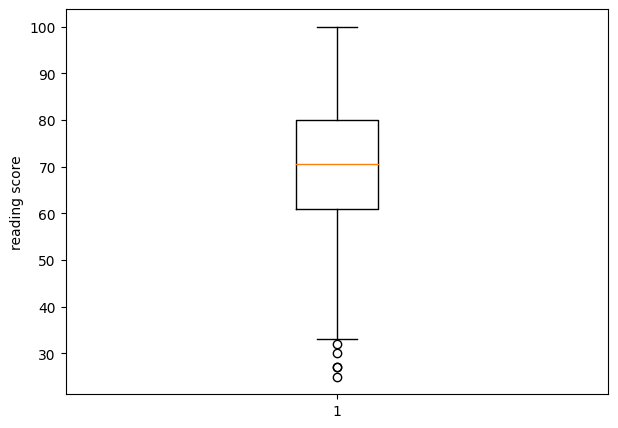

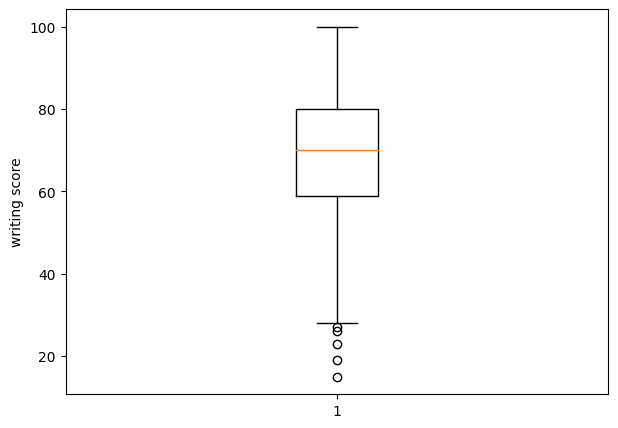

In [99]:
for num_col in numerical_cols:
  fig = plt.figure(figsize=(7, 5))
  res = plt.boxplot(df[num_col])
  plt.ylabel(num_col)
  plt.show()

#### Ujednolicenie wartości niektórych cech

In [120]:
print(df["parental level of education"].unique())
mapping = {
    'some college': 'high school',
    'some high school': 'high school',
    'associate\'s degree': 'bachelor\'s degree'}
df = df.replace({'parental level of education': mapping})
print(df["parental level of education"].unique())
df.head(7)

['some college', 'associate's degree', 'some high school', 'bachelor's degree', 'master's degree', 'high school']
Categories (6, object): ['associate's degree', 'bachelor's degree', 'high school', 'master's degree',
                         'some college', 'some high school']
['high school', 'bachelor's degree', 'master's degree']
Categories (3, object): ['bachelor's degree', 'high school', 'master's degree']


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group D,high school,standard,completed,59,70,78
1,male,group D,bachelor's degree,standard,none,96,93,87
2,female,group D,high school,free/reduced,none,57,76,77
3,male,group B,high school,free/reduced,none,70,70,63
4,female,group D,bachelor's degree,standard,none,83,85,86
5,male,group C,high school,standard,none,68,57,54
6,female,group E,bachelor's degree,standard,none,82,83,80


## Przygotowanie danych do trenowania

#### Przekształcenie danych ilościowych na kategorialne

W trenowaniu modelu wzięte pod uwagę zostaną jedynie oceny z egzaminu z matematyki. Przyjmujemy następujący podział wyników na kategorie (oceny):

- math score 𝛜 [0,50) - Ocena 2.0
- math score 𝛜 [50,60) - Ocena 3.0
- math score 𝛜 [60,70) - Ocena 3.5
- math score 𝛜 [70,80) - Ocena 4.0
- math score 𝛜 [80,90) - Ocena 4.5
- math score 𝛜 [90,100] - Ocena 5.0

In [126]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline

In [131]:
class ResultsToGrades(BaseEstimator, TransformerMixin):
  def __init__(self, selected_cols):
    self.selected_cols = selected_cols

  def fit(self, X, y=None):
    return self

  def transform(self, X, y=None):
    X_ = X.copy()
    X_.insert(len(X_.columns), 'MathGrade', np.nan, allow_duplicates=True)
    X_['MathGrade'] = X_['MathGrade'].astype("str")
    X_['MathGrade'][X_['math score']<50] = "Ocena 2.0"
    X_['MathGrade'][(X_['math score']>=50) & (X_['math score']<60)] = "Ocena 3.0"
    X_['MathGrade'][(X_['math score']>=60) & (X_['math score']<70)] = "Ocena 3.5"
    X_['MathGrade'][(X_['math score']>=70) & (X_['math score']<80)] = "Ocena 4.0"
    X_['MathGrade'][(X_['math score']>=80) & (X_['math score']<90)] = "Ocena 4.5"
    X_['MathGrade'][X_['math score']>=90] = "Ocena 5.0"
    X_['MathGrade'] = X_['MathGrade'].astype("category")
    return X_

In [132]:
selected_col = ["math score"]

transformer=Pipeline(
    steps=[("ResultsToGrades", ResultsToGrades(selected_col))]
)

df_transform=transformer.fit_transform(df)
df_transform.head(7)

<ipython-input-131-fe3b2494c877>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_['MathGrade'][X_['math score']<50] = "Ocena 2.0"
<ipython-input-131-fe3b2494c877>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_['MathGrade'][(X_['math score']>=50) & (X_['math score']<60)] = "Ocena 3.0"
<ipython-input-131-fe3b2494c877>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_['MathGrade'][(X_['math score']>=60) & (X_['math score']<70

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,MathGrade
0,female,group D,high school,standard,completed,59,70,78,Ocena 3.0
1,male,group D,bachelor's degree,standard,none,96,93,87,Ocena 5.0
2,female,group D,high school,free/reduced,none,57,76,77,Ocena 3.0
3,male,group B,high school,free/reduced,none,70,70,63,Ocena 4.0
4,female,group D,bachelor's degree,standard,none,83,85,86,Ocena 4.5
5,male,group C,high school,standard,none,68,57,54,Ocena 3.5
6,female,group E,bachelor's degree,standard,none,82,83,80,Ocena 4.5


#### Podział na zbiory X i y

In [140]:
y = df_transform["MathGrade"]
to_drop = numerical_cols + ["MathGrade"]
X = df_transform.drop(columns=to_drop)

In [141]:
y

0      Ocena 3.0
1      Ocena 5.0
2      Ocena 3.0
3      Ocena 4.0
4      Ocena 4.5
         ...    
995    Ocena 4.0
996    Ocena 4.5
997    Ocena 3.5
998    Ocena 4.5
999    Ocena 3.0
Name: MathGrade, Length: 1000, dtype: category
Categories (6, object): ['Ocena 2.0', 'Ocena 3.0', 'Ocena 3.5', 'Ocena 4.0', 'Ocena 4.5',
                         'Ocena 5.0']

In [142]:
X.head(7)

,gender,race/ethnicity,parental level of education,lunch,test preparation course
0,female,group D,high school,standard,completed
1,male,group D,bachelor's degree,standard,none
2,female,group D,high school,free/reduced,none
3,male,group B,high school,free/reduced,none
4,female,group D,bachelor's degree,standard,none
5,male,group C,high school,standard,none
6,female,group E,bachelor's degree,standard,none


#### One-hot encoding cech kategorialnych

In [143]:
X=pd.get_dummies(data=X, drop_first=True)
X.head(7)

,gender_male,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E,parental level of education_high school,parental level of education_master's degree,lunch_standard,test preparation course_none
0,0,0,0,1,0,1,0,1,0
1,1,0,0,1,0,0,0,1,1
2,0,0,0,1,0,1,0,0,1
3,1,1,0,0,0,1,0,0,1
4,0,0,0,1,0,0,0,1,1
5,1,0,1,0,0,1,0,1,1
6,0,0,0,0,1,0,0,1,1


Znaczenie kodowania:

**gender**
*   `gender_male == 0` -> female
*   `gender_male == 1` -> male

**race/ethnicity**
*   `[B,C,D,E] == [0,0,0,0]` -> group A
*   `[B,C,D,E] == [1,0,0,0]` -> group B
*   `[B,C,D,E] == [0,1,0,0]` -> group C
*   `[B,C,D,E] == [0,0,1,0]` -> group D
*   `[B,C,D,E] == [0,0,0,1]` -> group E

**parental level of education**
*   `[high school,masters] == [0,0]` -> bachelor's degree
*   `[high school,masters] == [1,0]` -> high school
*   `[high school,masters] == [0,1]` -> master's

**lunch standard**
*   `lunch_standard == 0` -> free/reduced
*   `lunch_standard == 1` -> standard

**test preparation course_none**
*   `test preparation course_none == 0` -> completed
*   `test preparation course_none == 1` -> none

#### Zapis zbiorów X i y do plików

In [144]:
X.to_csv("X.csv", index=False)
y.to_csv("y.csv", index=False)